# Setting up the workspace

## Importing the necessary modules

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## Setting working directory

In [2]:
os.chdir('/Users/lewyiliang/Documents/Python')
os.getcwd()  # Prints the current working directory

'/Users/lewyiliang/Documents/Python'

## Loading the dataset


In [3]:
addresses = pd.read_excel('Address_TrainingData.xlsx')

# Data exploration

In [4]:
# Print the first few rows of the dataframe
display(addresses.head())

,focal_addr,focal_addr_type,blacklist,last_ts,tot_txn,tot_val,min_val,max_val,sd2_val,unq_other_addr,...,days_diff_first_last_sent,to_contract_txn,tot_val_to_contract,min_val_to_contract,max_val_to_contract,avg_val_to_contract,erc20_txn,sum_val_erc20,erc721_txn,sum_val_erc721
0,0x00000002de4e35b0838fe97e09bb26317c2e570c,contract address,0,2023-01-29 21:43:23,402,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,...,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,NaN
1,0x0000000506063a51c6ce59906d8c40f7d7fe92a7,wallet address,1,2023-02-15 15:53:59,16,1.843963e+19,0.000000e+00,1.800000e+19,1.892915e+37,13,...,153.244306,10,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3,0.000000e+00,0,NaN
2,0x0000098a312e1244f313f83cac319603a97f4582,wallet address,1,2023-02-08 12:19:59,8792,1.500201e+19,0.000000e+00,1.000000e+18,1.703185e+33,1486,...,103.834028,8493,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1356,0.000000e+00,4225,0.000000e+00
3,0x000677bbab0fea85506f5f63806d331c9c2df1ac,wallet address,0,2022-08-21 09:26:43,1,7.287733e+14,7.287733e+14,7.287733e+14,0.000000e+00,1,...,0.000000,0,NaN,NaN,NaN,NaN,0,NaN,0,NaN
4,0x000f4432a40560bbff1b581a8b7aded8dab80026,wallet address,1,2023-02-15 01:53:11,247,4.243310e+19,0.000000e+00,8.200000e+18,5.954650e+35,91,...,179.527037,215,2.880170e+19,0.0,8.200000e+18,1.339614e+17,30,1.045000e+19,17,5.500000e+17


In [5]:
# Prints the dimensions (no. of rows and columns) of the dataframe
print(addresses.shape)

(6278, 37)


In [6]:
# Print the data types of the columns in the dataframe
print(addresses.dtypes)

focal_addr                           object
focal_addr_type                      object
blacklist                             int64
last_ts                      datetime64[ns]
tot_txn                               int64
tot_val                             float64
min_val                             float64
max_val                             float64
sd2_val                             float64
unq_other_addr                        int64
days_diff_first_last                float64
contract_creation                     int64
recv_txn                              int64
tot_val_recv                        float64
min_val_recv                        float64
max_val_recv                        float64
avg_val_recv                        float64
sd2_val_recv                        float64
unq_from_addr                         int64
days_diff_first_last_recv           float64
sent_txn                              int64
tot_val_sent                        float64
min_val_sent                    

In [7]:
# Print summary statistics of the numeric columns in the dataframe
display(addresses.describe())

,blacklist,tot_txn,tot_val,min_val,max_val,sd2_val,unq_other_addr,days_diff_first_last,contract_creation,recv_txn,...,days_diff_first_last_sent,to_contract_txn,tot_val_to_contract,min_val_to_contract,max_val_to_contract,avg_val_to_contract,erc20_txn,sum_val_erc20,erc721_txn,sum_val_erc721
count,6278.000000,6278.000000,6.278000e+03,6.278000e+03,6.278000e+03,6.278000e+03,6278.000000,6278.000000,6278.000000,6278.000000,...,5705.000000,6278.000000,3.980000e+03,3.980000e+03,3.980000e+03,3.980000e+03,6278.000000,2.499000e+03,6278.000000,9.620000e+02
mean,0.366518,39.157534,1.063192e+20,5.212757e+18,5.634259e+19,7.766375e+40,15.294202,66.141243,33.285919,10.206913,...,64.696854,24.517044,6.273355e+19,8.021669e+18,4.435057e+19,1.298802e+19,5.730487,2.340883e+18,5.231125,5.496576e+17
std,0.481892,328.539457,2.339150e+21,3.988803e+20,1.542312e+21,2.812148e+42,212.144159,73.398356,323.555805,261.895382,...,73.353430,186.057228,1.919675e+21,5.009349e+20,1.680433e+21,5.659810e+20,46.906240,4.124832e+19,78.292001,4.219647e+18
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.152922e+18,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,2.000000,5.074855e+15,0.000000e+00,4.065811e+15,0.000000e+00,1.000000,0.000833,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,0.000000,4.000000,9.823210e+16,0.000000e+00,6.095000e+16,3.556994e+31,3.000000,23.210208,0.000000,1.000000,...,18.285417,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
75%,1.000000,16.000000,1.256991e+18,4.307715e+15,5.000000e+17,1.097591e+34,8.000000,151.049488,9.000000,2.000000,...,147.811285,8.000000,5.429014e+17,0.000000e+00,2.602500e+17,3.491688e+16,2.000000,0.000000e+00,0.000000,7.000000e+16
max,1.000000,15161.000000,1.105386e+23,3.160245e+22,9.563000e+22,1.541584e+44,13909.000000,179.999838,15161.000000,15161.000000,...,179.997986,8536.000000,1.086491e+23,3.160245e+22,9.563000e+22,3.160245e+22,2621.000000,1.443000e+21,4225.000000,9.254929e+19


In [8]:
# Plot correlation heatmap to find out correlations between columns in the dataframe
addresses.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,blacklist,tot_txn,tot_val,min_val,max_val,sd2_val,unq_other_addr,days_diff_first_last,contract_creation,recv_txn,tot_val_recv,min_val_recv,max_val_recv,avg_val_recv,sd2_val_recv,unq_from_addr,days_diff_first_last_recv,sent_txn,tot_val_sent,min_val_sent,max_val_sent,avg_val_sent,sd2_val_sent,unq_to_addr,days_diff_first_last_sent,to_contract_txn,tot_val_to_contract,min_val_to_contract,max_val_to_contract,avg_val_to_contract,erc20_txn,sum_val_erc20,erc721_txn,sum_val_erc721
blacklist,1.0,0.1197,0.04798,-0.009816,0.03975,0.03629,0.06969,0.5213,0.1352,0.03888,0.03164,-0.009296,0.06154,0.01043,0.06684,0.02908,0.2885,0.1493,0.04721,0.003909,0.03393,0.01215,0.02878,0.2254,0.5568,0.1353,0.02438,-0.01535,0.01714,-0.004649,0.1449,0.03929,0.08773,0.0133
tot_txn,0.1197,1.0,0.008747,-0.001478,0.001307,-0.0007244,0.8722,0.136,0.9831,0.8043,0.006639,-0.00164,-0.001522,-0.002137,-0.002146,0.785,0.1316,0.6039,0.008107,-0.00265,0.001851,-0.0026,0.0005246,0.5617,0.1544,0.5989,0.007252,-0.00244,-0.0001444,-0.002975,0.3598,0.0438,0.5177,0.09279
tot_val,0.04798,0.008747,1.0,0.3405,0.9294,0.8337,0.006087,0.02658,0.009281,0.005269,0.7585,0.3408,0.7572,0.5029,0.6456,0.005187,0.0682,0.007652,0.9271,0.4476,0.8344,0.5751,0.6883,0.005661,-0.02133,0.007077,0.9188,0.4124,0.9133,0.611,0.003424,0.04447,-0.0001426,0.1235
min_val,-0.009816,-0.001478,0.3405,1.0,0.2582,-0.0003609,-0.0008192,-0.01171,-0.001344,-0.0004594,0.4038,0.9995,0.5019,0.9652,-0.0006022,-0.0003045,-0.01043,-0.001871,0.232,0.9134,0.2746,0.8779,-0.0003022,-0.002877,-0.01189,-0.001654,0.2605,1.0,0.2978,0.8849,-0.001597,-0.0008024,-0.0008733,0.005357
max_val,0.03975,0.001307,0.9294,0.2582,1.0,0.8245,0.001202,0.01497,0.001892,0.001542,0.5078,0.2581,0.5372,0.3616,0.4274,0.0013,0.04933,0.0001317,0.9751,0.3423,0.9657,0.4656,0.7624,-0.000145,-0.0214,0.0001251,0.9068,0.2768,0.9323,0.4301,0.001841,0.01217,-0.002009,0.0229
sd2_val,0.03629,-0.0007244,0.8337,-0.0003609,0.8245,1.0,-0.0003102,0.01846,-0.0002352,3.399e-05,0.5855,-0.0006907,0.6151,0.1675,0.7223,5.292e-05,0.05052,-0.001265,0.7999,0.1133,0.7801,0.3163,0.907,-0.001857,-0.01966,-0.001189,0.7978,-0.0003844,0.8301,0.3818,0.0005509,-0.001072,-0.001841,-0.003694
unq_other_addr,0.06969,0.8722,0.006087,-0.0008192,0.001202,-0.0003102,1.0,0.07619,0.8742,0.9645,0.01007,-0.0009431,0.0002757,-0.001137,-0.00079,0.983,0.0876,0.1739,0.002505,-0.001695,0.001694,-0.001484,0.0007241,0.2008,0.1085,0.1692,0.001646,-0.001777,-0.0005712,-0.002032,0.08331,0.0218,0.1469,0.118
days_diff_first_last,0.5213,0.136,0.02658,-0.01171,0.01497,0.01846,0.07619,1.0,0.126,0.0392,0.02341,-0.01439,0.03356,-0.002312,0.04112,0.02979,0.7306,0.1763,0.02278,-0.0008942,0.00703,0.002431,0.008484,0.2579,0.9573,0.1596,0.002458,-0.0191,-0.00553,-0.01397,0.1471,0.05706,0.06701,0.07319
contract_creation,0.1352,0.9831,0.009281,-0.001344,0.001892,-0.0002352,0.8742,0.126,1.0,0.815,0.007099,-0.001371,-0.0006722,-0.001697,-0.001391,0.7966,0.1081,0.5609,0.00857,-0.002307,0.002494,-0.002142,0.001022,0.5106,0.1436,0.5541,0.007698,-0.002234,0.0003478,-0.002623,0.3642,0.04554,0.5268,0.09324
recv_txn,0.03888,0.8043,0.005269,-0.0004594,0.001542,3.399e-05,0.9645,0.0392,0.815,1.0,0.01003,-0.0009333,3.543e-06,-0.001197,-0.0009929,0.9797,0.09457,0.01198,0.001416,-0.000324,0.00222,0.0001511,0.001576,0.02557,0.02714,0.008263,0.0004627,-0.0004962,6.807e-05,-0.0004135,0.02595,-0.002211,0.01569,-0.01678


In [9]:
# Compute the correlation coefficients between the 'blacklist' column and all other columns in the dataframe, and sort them in descending order
correlations = addresses.corr()['blacklist'].sort_values(ascending=False)

# Prints the top 10 columns that are most strongly correlated with the 'blacklist' column apart from 'blacklist'
display(correlations.head(11))

blacklist                    1.000000
days_diff_first_last_sent    0.556828
days_diff_first_last         0.521271
days_diff_first_last_recv    0.288488
unq_to_addr                  0.225379
sent_txn                     0.149256
erc20_txn                    0.144937
to_contract_txn              0.135281
contract_creation            0.135243
tot_txn                      0.119699
erc721_txn                   0.087730
Name: blacklist, dtype: float64

# Declare feature and target variable

In [10]:
# Defining the list of transactional level features from the dataset
features = ["tot_txn", "tot_val", "min_val", "max_val", "sd2_val", "unq_other_addr", "days_diff_first_last", "contract_creation", "recv_txn", "tot_val_recv", "min_val_recv", "max_val_recv", "avg_val_recv", "sd2_val_recv", "unq_from_addr", "days_diff_first_last_recv", "sent_txn", "tot_val_sent", "min_val_sent", "max_val_sent", "avg_val_sent", "sd2_val_sent", "unq_to_addr", "days_diff_first_last_sent", "to_contract_txn", "tot_val_to_contract", "min_val_to_contract", "max_val_to_contract", "avg_val_to_contract", "erc20_txn", "sum_val_erc20", "erc721_txn", "sum_val_erc721"]

# Extract the columns corresponding to the features and the 'blacklist' column from the dataframe
X = addresses[features].copy()
y = addresses["blacklist"].copy()

In [11]:
# Print the number of missing values in each column of the dataframe
print(addresses.isnull().sum())

focal_addr                      0
focal_addr_type                 0
blacklist                       0
last_ts                         0
tot_txn                         0
tot_val                         0
min_val                         0
max_val                         0
sd2_val                         0
unq_other_addr                  0
days_diff_first_last            0
contract_creation               0
recv_txn                        0
tot_val_recv                    0
min_val_recv                 2890
max_val_recv                 2890
avg_val_recv                 2890
sd2_val_recv                 2890
unq_from_addr                   0
days_diff_first_last_recv    2890
sent_txn                        0
tot_val_sent                    0
min_val_sent                  573
max_val_sent                  573
avg_val_sent                  573
sd2_val_sent                  573
unq_to_addr                     0
days_diff_first_last_sent     573
to_contract_txn                 0
tot_val_to_con

# Preprocessing: Dealing with missing values in feature columns

In [12]:
# Instantiate a SimpleImputer object to fill in missing values for features with the median value of each feature
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
X = imputer.fit_transform(X)

# Standardize the features so that they have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
# Verify that there are no missing values in X_imputed
print(pd.DataFrame(X, columns=features).isnull().sum())

tot_txn                      0
tot_val                      0
min_val                      0
max_val                      0
sd2_val                      0
unq_other_addr               0
days_diff_first_last         0
contract_creation            0
recv_txn                     0
tot_val_recv                 0
min_val_recv                 0
max_val_recv                 0
avg_val_recv                 0
sd2_val_recv                 0
unq_from_addr                0
days_diff_first_last_recv    0
sent_txn                     0
tot_val_sent                 0
min_val_sent                 0
max_val_sent                 0
avg_val_sent                 0
sd2_val_sent                 0
unq_to_addr                  0
days_diff_first_last_sent    0
to_contract_txn              0
tot_val_to_contract          0
min_val_to_contract          0
max_val_to_contract          0
avg_val_to_contract          0
erc20_txn                    0
sum_val_erc20                0
erc721_txn                   0
sum_val_

# Split data into separate training and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [15]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((4394, 33), (1884, 33))

## Constructing the random forest model using all 33 features

In [16]:
# Initialize the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=123)

In [17]:
# Fitting a model and making predictions
rf.fit(X_train,y_train)

# Use the trained model to make predictions on the test data
y_pred = rf.predict(X_test)

In [18]:
# Print the accuracy score of the model
print('Model accuracy score with all 33 transaction level features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with all 33 transaction level features: 0.9995


### Tuning hyperparameters

In [19]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [20]:
# Create a grid search object
grid_rf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=5)

# Fit the grid search object to the data
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [21]:
# Print the best parameters and score
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.9995446782816464


In [22]:
# Create a new random forest classifier with the best parameters
rf = RandomForestClassifier(**grid_rf.best_params_, random_state=123)

# Train the model on the training data with the new hyperparameters
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=123)

In [23]:
# Use the trained model to make predictions on the test data
y_pred = rf.predict(X_test)

In [24]:
# Print the accuracy score of the model with the new hyperparameters
print('Model accuracy score with all 33 transaction level features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with all 33 transaction level features: 0.9995


In [25]:
# Print the confusion matrix of the model predictions
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1171    1]
 [   0  712]]


<AxesSubplot:>

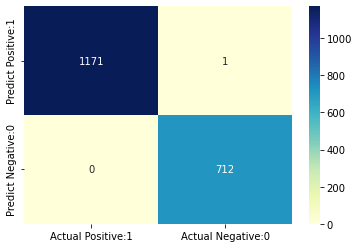

In [26]:
# Visualize the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [27]:
# Print the classification report of the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1172
           1       1.00      1.00      1.00       712

    accuracy                           1.00      1884
   macro avg       1.00      1.00      1.00      1884
weighted avg       1.00      1.00      1.00      1884



# Feature selection

In [28]:
# Find the important features with the random forest model
importance = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the table of feature importance
print(feature_importance)

                      Feature  Importance
7           contract_creation    0.477376
29                  erc20_txn    0.066034
22                unq_to_addr    0.061770
16                   sent_txn    0.043522
5              unq_other_addr    0.041077
31                 erc721_txn    0.039860
0                     tot_txn    0.031590
24            to_contract_txn    0.028871
23  days_diff_first_last_sent    0.025929
9                tot_val_recv    0.023560
14              unq_from_addr    0.022213
6        days_diff_first_last    0.019959
8                    recv_txn    0.016924
10               min_val_recv    0.013615
27        max_val_to_contract    0.010877
17               tot_val_sent    0.009361
19               max_val_sent    0.008263
12               avg_val_recv    0.007943
25        tot_val_to_contract    0.007462
11               max_val_recv    0.007273
3                     max_val    0.006674
15  days_diff_first_last_recv    0.006357
1                     tot_val    0

In [29]:
# Select the top 13 important features
feature_importance_top13 = feature_importance.head(13) # selecting feature with importance > 0.02
display(feature_importance_top13)

,Feature,Importance
7,contract_creation,0.477376
29,erc20_txn,0.066034
22,unq_to_addr,0.061770
16,sent_txn,0.043522
5,unq_other_addr,0.041077
31,erc721_txn,0.039860
0,tot_txn,0.031590
24,to_contract_txn,0.028871
23,days_diff_first_last_sent,0.025929
9,tot_val_recv,0.023560


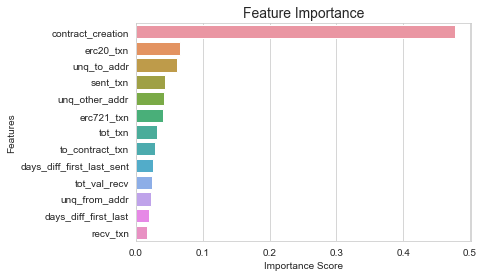

In [30]:
# Visualize the feature importance with a barplot
sns.set_style("whitegrid")
g = sns.barplot(x="Importance", y="Feature", data=feature_importance_top13)
g.set_title("Feature Importance", fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Random Forest model based on the 13 selected features 

In [31]:
# Define the list of selected features
selected_features = ["contract_creation", "erc20_txn", "unq_to_addr", "sent_txn", "erc721_txn", "to_contract_txn", "unq_other_addr", "tot_txn", "tot_val_recv", "days_diff_first_last_sent", "days_diff_first_last", "recv_txn", "unq_from_addr"]

In [32]:
# Selecting top 13 important features
X = addresses[feature_importance_top13['Feature']].copy()

In [33]:
# Check for missing values in X
missing_values = X.isnull().sum()
print(missing_values)

contract_creation              0
erc20_txn                      0
unq_to_addr                    0
sent_txn                       0
unq_other_addr                 0
erc721_txn                     0
tot_txn                        0
to_contract_txn                0
days_diff_first_last_sent    573
tot_val_recv                   0
unq_from_addr                  0
days_diff_first_last           0
recv_txn                       0
dtype: int64


## Preprocessing: Dealing with missing values in feature columns

In [34]:
# Fill in missing values for features with the median value of each feature
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
X = imputer.fit_transform(X)

# Standardize the features so that they have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
# Verify that there are no missing values in X
print(pd.DataFrame(X, columns=selected_features).isnull().sum())

contract_creation            0
erc20_txn                    0
unq_to_addr                  0
sent_txn                     0
erc721_txn                   0
to_contract_txn              0
unq_other_addr               0
tot_txn                      0
tot_val_recv                 0
days_diff_first_last_sent    0
days_diff_first_last         0
recv_txn                     0
unq_from_addr                0
dtype: int64


In [36]:
# Split data into separate training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Tuning hyperparameters

In [37]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a grid search object
grid_rf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=5)

In [38]:
# Fit the grid search object to the data
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [39]:
# Print the best parameters and score
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9997722095671981


In [40]:
# Create a Random Forest Classifier with the best parameters
rf = RandomForestClassifier(**grid_rf.best_params_, random_state=123)

# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [41]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [42]:
# Check accuracy score 
print('Model accuracy score with only the 13 selected features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with only the 13 selected features: 0.9995


In [43]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1171    1]
 [   0  712]]


<AxesSubplot:>

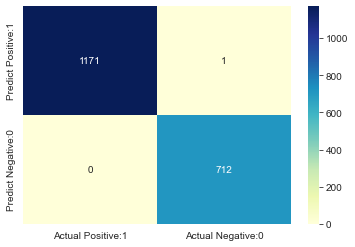

In [44]:
# Visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [45]:
# Print the classification report of the model predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1172
           1       1.00      1.00      1.00       712

    accuracy                           1.00      1884
   macro avg       1.00      1.00      1.00      1884
weighted avg       1.00      1.00      1.00      1884



# Testing the model with a new address and it's transaction history

## Testing with a new record that is blacklisted

In [46]:
# Load the new data
new_data_bad = pd.read_excel('new_data_bad.xlsx') # randomly selected a record from the dataset provided to test the model

### Prepare the new data


In [47]:
# Select the same columns used in the training dataset for prediction
selected_features = new_data_bad[["contract_creation", "erc20_txn", "unq_to_addr", "sent_txn", "erc721_txn", "to_contract_txn", "unq_other_addr", "tot_txn", "tot_val_recv", "days_diff_first_last_sent", "days_diff_first_last", "recv_txn", "unq_from_addr"]]

# Impute any missing values with median values from the training data
selected_features = imputer.transform(selected_features)

# Standardize the data using the same scaler as used in the training data
selected_features = scaler.transform(selected_features) 

/Users/lewyiliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


### Predicting the class of the new address and classification of address

In [48]:
# Apply the random forest model to predict the class of the new address
predicted_class = rf.predict(selected_features)

In [49]:
# Print the predicted class
predicted_class
if predicted_class >= 0.5:
    print('The new address is bad.')
else:
    print('The new address is good.')

The new address is bad.


## Testing with a new record that is not blacklisted

In [50]:
# Load the new data
new_data_good = pd.read_excel('new_data_good.xlsx') # randomly selected a record from the dataset provided to test the model

### Prepare the new data


In [51]:
# Select the same columns used in the training dataset for prediction
selected_features = new_data_good[["contract_creation", "erc20_txn", "unq_to_addr", "sent_txn", "erc721_txn", "to_contract_txn", "unq_other_addr", "tot_txn", "tot_val_recv", "days_diff_first_last_sent", "days_diff_first_last", "recv_txn", "unq_from_addr"]]

# Impute any missing values with median values from the training data
selected_features = imputer.transform(selected_features)

# Standardize the data using the same scaler as used in the training data
selected_features = scaler.transform(selected_features) 

/Users/lewyiliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


### Predicting the class of the new address and classification of address

In [52]:
# Apply the random forest model to predict the class of the new address
predicted_class = rf.predict(selected_features)

In [53]:
# Print the predicted class
predicted_class
if predicted_class >= 0.5:
    print('The new address is bad.')
else:
    print('The new address is good.')

The new address is good.
